In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 3.14, 1
beta = 2.5

# Size of dataset
size = 100

# Predictor variable
X = np.random.randn(size)

# Simulate outcome variable
Y = alpha + beta*X + np.random.randn(size)*sigma

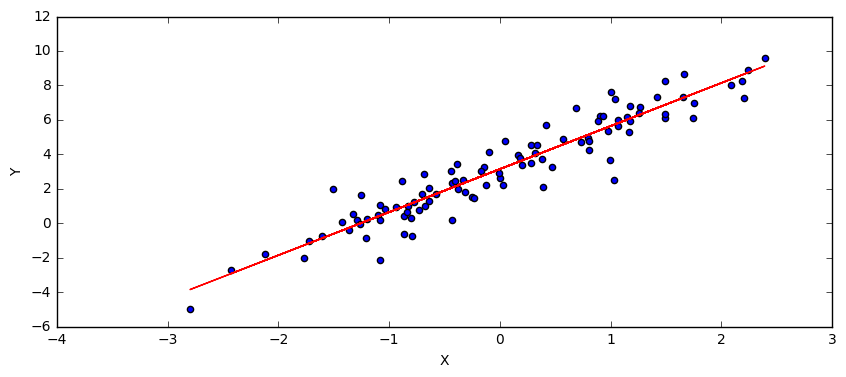

In [9]:
%matplotlib inline

fig, axes = plt.subplots(1, 1, figsize=(10,4))
axes.scatter(X, Y)
axes.plot(X, alpha + beta*X, 'r')
axes.set_ylabel('Y'); axes.set_xlabel('X');

In [3]:
from pymc3 import Model, Normal, HalfNormal

In [10]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha_ = Normal('alpha', mu=0, sd=10)
    beta_ = Normal('beta', mu=0, sd=10)
    sigma_ = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu_ = alpha_ + beta_*X

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu_, sd=sigma_, observed=Y)

In [11]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)

print(map_estimate)

Optimization terminated successfully.
         Current function value: 146.084110
         Iterations: 15
         Function evaluations: 24
         Gradient evaluations: 24
{'alpha': array(3.1206253352268867), 'beta': array(2.4832301014036267), 'sigma_log_': array(-0.030296094373094672)}


In [13]:
from scipy import optimize
map_estimate_2 = find_MAP(model=basic_model, fmin=optimize.fmin_powell)

print(map_estimate_2)

Optimization terminated successfully.
         Current function value: 146.084110
         Iterations: 6
         Function evaluations: 210
{'alpha': array(3.120564456242811), 'beta': array(2.4831710990558578), 'sigma_log_': array(-0.03023577278041412)}


In [16]:
from pymc3 import NUTS, sample

with basic_model:
    # draw 2000 posterior samples
    trace = sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -150.79: 100%|██████████| 200000/200000 [00:20<00:00, 9758.38it/s]
Finished [100%]: Average ELBO = -150.79
100%|██████████| 2000/2000 [00:01<00:00, 1293.05it/s]


In [17]:
from pymc3 import Slice

with basic_model:

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # instantiate sampler
    step = Slice(vars=[sigma_])

    # draw 5000 posterior samples
    trace = sample(5000, step=step, start=start)

Assigned NUTS to alpha
Assigned NUTS to beta


Optimization terminated successfully.
         Current function value: 146.084110
         Iterations: 6
         Function evaluations: 210


100%|██████████| 5000/5000 [00:05<00:00, 835.98it/s]


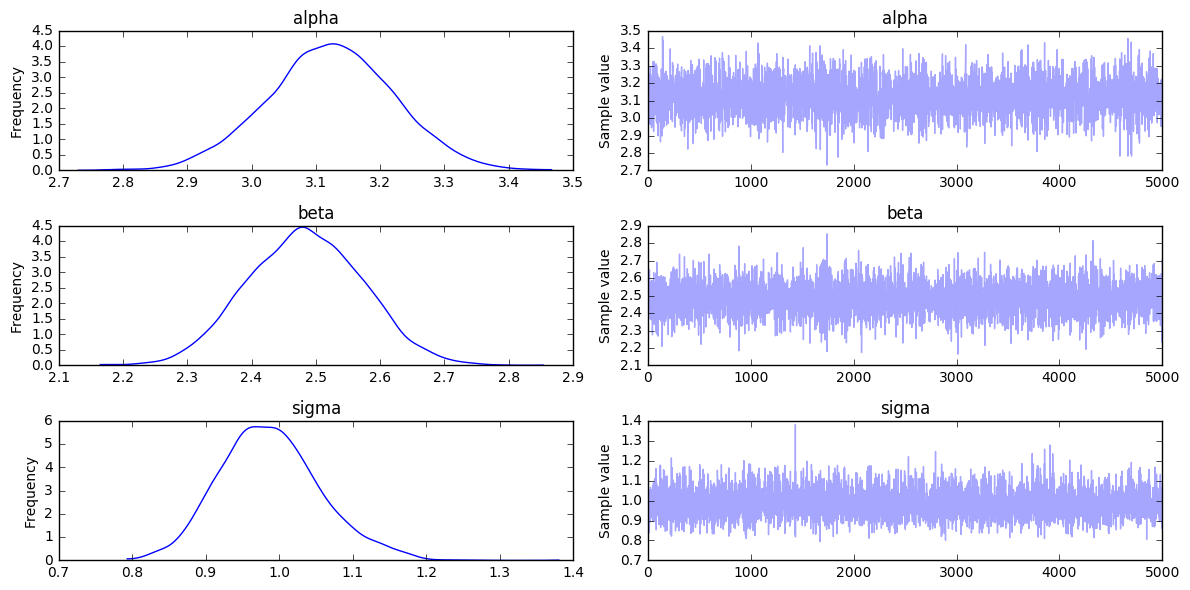

In [18]:
from pymc3 import traceplot

traceplot(trace);

In [29]:
print trace['alpha'].mean()
print sorted(trace['alpha'])[-5:]

3.12344883058
[2.7305360535541459, 2.7760425052676965, 2.781885139015094, 2.7821540477964608, 2.7823733871157499]


In [21]:
trace['beta'].mean()

2.482300513365332

In [22]:
trace['sigma'].mean()

0.98721341998736356